Constants

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sep = 0.04856*1.5e11
ndof = 5
sb_const = 5.67e-8
gas_const = 8314
kb_const = 1.38e-23
m_H = 1.67e-27
T_star = 2900
R_star = 0.141*695700e3
M_star = 0.1221*1.99e30
m_p = 1.07*5.972e24#10*5.972e24# #lower/upper bound
r_p = 1*6371e3 #assumed value
G_const = 6.67e-11

grav = (G_const * m_p)/(r_p**2)
density = (3 * m_p)/(4*np.pi*r_p**3)

In [4]:
bond_a = 0.306 #bond abledo of earth
mu = 28.97 # nitrogen

2.1 stellar irradiation and orbital parameters

In [5]:
T_irr = T_star*(R_star/sep)**(1/2)*(1-bond_a)**(1/4)
flux = sb_const*T_irr**4 # at substellar point
rot_freq = (G_const*M_star/sep**3)*(1/2)

2.2 thermodynamics

In [6]:
T_arr = np.arange(start = 50, stop = 500, step = 50)
p_arr = [0.001, 0.01, 0.1, 1, 10]

#values for nitrogen:
L_avg = 2.3e5
T_con0 = 775
T_crit = 126.2
p_sat0 = 2.7e4
p_crit = 34
#atmosphere will be gaseous as long as T>T_crit and P<P_crit

In [7]:
m = mu * m_H
gamma = 1 + 2/ndof
ad_coeff = 2/(2+ndof)
cs = ((gamma*kb_const*T_irr)/m)**(1/2)
cp = ((2+ndof)*gas_const)/(2*mu)
R_const = gas_const/mu

print(cs)

print(R_const) # should be roughly 287 for nitrogen

p_sat = [p_sat0 * np.exp(-1*T_con0/t) for t in T_arr]

T_con = [T_con0/np.log(p_sat0/p) for p in p_arr]
T_con

350.23359768922785
286.9865377977218


[45.29158229318774,
 52.33388062275679,
 61.96937603333906,
 75.95364348042823,
 98.0887619641557]

2.3 infrared photospheric pressure

- assume a thin atmosphere
- model atmospheres as consisting purely of molecular nitrogen but assume they contain minor amounts of other chemical species which absorb strongly in the infrared
- the radiative timescale is assumed to be approximately  constant throughout
- regard p as a free parameter which characterises the thickness of the atmosphere
- neglect any effects associated with clouds or hazes (see Heng et al 2012)

2.4 hydrodynamic shallow water model

In [8]:
scale_height = (kb_const*T_irr)/(m*grav)
beta = 2*rot_freq/R_const
t0 = (grav*scale_height)**(-1/4) * beta**(-1/2)
s0 = scale_height/t0

t_rad = [(cp*p)/(sb_const*grav*T_irr**3) for p in p_arr]
t_drag = 2*np.pi/rot_freq
t_rad

[0.05821192284588338,
 0.5821192284588339,
 5.821192284588339,
 58.211922845883386,
 582.1192284588338]

2.5 basic trends with strength of stellar irradiation

In [5]:
u_max = 1e3 # predict ~ 1-2km s-1 zonal flows
t_adv = r_p/u_max
t_adv

6371.0

2.6 inefficiency of thermal conduction

In [10]:
k_cond = 10**10
cp0 = 10**7
alpha0 = k_cond/(density*cp0) # thermal diffusivity of the material of the rocky core
sep_const = 1/R_const**2

t_cond = (density*cp0*R_const**2)/k_cond
t_cond2 = 4e7 * (density/3e6) * (r_p/695700e3)**2 # years
t_cond2 = t_cond2 * 3.15e7
print(t_cond, t_cond2)

#demanding that t_rad < t_cond yeilds
temp = (k_cond/(sb_const*R_const))**(1/3) #temp > ...
temp2 = 65 * (r_p/695700e3)**(-1/3)
temp, temp2

485864.5379298987 207784260.04384068


(85019.48541470546, 310.68347640725835)

3.1 conditions related to advection and radiation

In [11]:
# condition t_adv < t_rad:
rp_less = [((cp*u_max*p)/(sb_const*grav)) * T_star**(-3) * R_star**(-3/2) * (1-bond_a)**(-3/4) * sep**(3/2) for p in p_arr]
print(rp_less)

rp_less3 = [((cp*cs*p)/(sb_const*grav)) * T_star**(-3) * R_star**(-3/2) * (1-bond_a)**(-3/4) * sep**(3/2) for p in p_arr]
print(rp_less3)

rp_less2 = [(gamma*kb_const/m)**(1/4) * ((3*cp*p)/(4*np.pi*G_const*density*sb_const))**(1/2) * T_star**(-5/4) * R_star**(-5/8) * (1-bond_a)**(-5/16) * sep**(5/8) for p in p_arr]
print(rp_less2)

[58.21192284588337, 582.1192284588338, 5821.192284588338, 58211.922845883375, 582119.2284588339]
[20.387771166721492, 203.87771166721492, 2038.7771166721495, 20387.771166721494, 203877.71166721496]
[11396.950912554752, 36040.32326480752, 113969.50912554751, 360403.2326480752, 1139695.0912554753]


3.2 conditions related to thermodynamics of phase change

In [12]:
T_eq = T_irr/np.sqrt(2)

a_con = [(R_star/2) * (T_star/T_con0)**2 * (1-bond_a)**0.5 * (np.log(p_sat0/p))**2 for p in p_arr]
a_crit = (R_star/2) * (T_star/T_crit)**2 * (1-bond_a)**0.5

a_con.append(a_crit)
print(np.max(a_con)/1.5e11) #sep needs to be less than this

1.1167619430232272


3.3 conditions related to orbital circularisation and spin synchronisation

requires knowledge of the age of the star

3.4 other conditions

In [27]:
#radius less than hill sphere
rh = sep*(m_p/(3*M_star))**(1/3)
#which implies
a_h = ((9*M_star)/(4*np.pi*density))**(1/3) #sep greater than

#thermal speed (cs) less than escape velocity
v_esc = ((2*G_const*m_p)/r_p)**(1/2)
#which implies
a_list = [0.025, 0.05, 0.075, 0.1]
a_list = [a*1.5e11 for a in a_list]
R_esc = [((3*gamma*kb_const)/(8*np.pi*G_const*density*m))**(2/3) * T_star**(2/3) * (1-bond_a)**(1/6) * a**(-1/3) for a in a_list]
# r greater than this

In [14]:
#habitable zone
a1 = 0.84
a2 = 2.7619e-5
a3 = 3.8095e-9
a4 = 1.67
a5 = 1.3786e-4
a6 = 1.4286e-9

T_bar = T_star - 5700
L_star = 4*np.pi*(R_star**2)*sb_const*(T_star**4)
L_sol = 3.839e26

a_in = (a1 - a2*T_bar - a3*T_bar**2) * (L_star/L_sol)**0.5
a_out = (a4 - a5*T_bar - a6*T_bar**2) * (L_star/L_sol)**0.5

a_in, a_out

(0.031541082414772735, 0.07267365539654731)

3.5 stability diagram

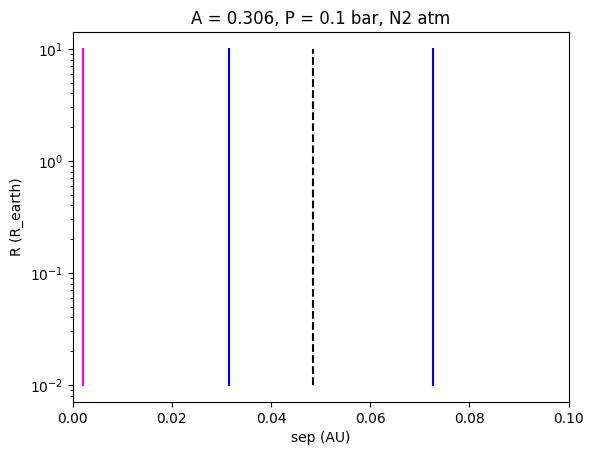

In [31]:
plt.plot([0.04856, 0.04856], [0.01, 10], color='black', ls='dashed') #actual sep

plt.plot([a_in, a_in], [0.01, 10], color='blue') # between
plt.plot([a_out, a_out], [0.01, 10], color='blue')

plt.plot([a_con[2]/1.5e11, a_con[2]/1.5e11], [0.01, 10], color='red') # less than
plt.plot([a_h/1.5e11, a_h/1.5e11], [0.01, 10], color='magenta') # greater than

#plt.plot(a_list, R_esc, color='green')

plt.yscale('log')
plt.ylabel('R (R_earth)')
plt.xlabel('sep (AU)')
plt.xlim(0,0.1)
plt.title('A = 0.306, P = 0.1 bar, N2 atm')
plt.show()

3.6 stability diagrams applied

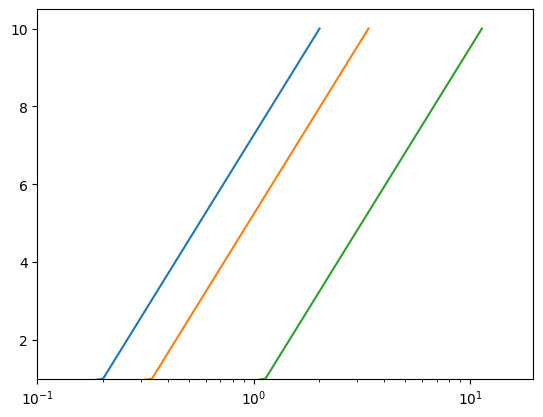

In [20]:
b_albedos = [0, 0.5, 0.9]

for b in b_albedos:
    lim_arr = []
    for p in p_arr:
        lim = ((2+ndof)*gas_const*u_max*p)/(2*sb_const*grav*r_p)
        lim = lim * T_star**(-3) * R_star**(-3/2) * (1-b)**(-3/4) * sep**(3/2)
        lim_arr.append(lim)

    plt.plot(lim_arr, p_arr)

plt.xscale('log')
plt.ylim(1)
plt.xlim(0.1)
plt.show()